<p style="background-color:#483D8B; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Adult Income Project</b>
</p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<span style="color:green">**Data Set Information:**</span>

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.

<span style="color:green">**Attribute Information:**</span>

1. **Age**: Describes the age of individuals. Continuous.
2. **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. **Fnlwgt**: Continuous.
4. **Education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. **Education-num**: Number of years spent in education. Continuous.
6. **Marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. **Occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. **Relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. **Race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. **Sex**: Female, Male.
11. **Capital-gain**: Continuous.
12. **Capital-loss**: Continuous.
13. **Hours-per-week**: Continuous.
14. **Native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. **Salary**: >50K, <=50K


## <span style="color:#483D8B">Import Libraries</span>


In [2]:
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,9)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis and Visualization

In [4]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.sample(5).T

,6157,8567,32018,15535,6130
age,30,44,68,36,25
workclass,Private,Local-gov,Self-emp-not-inc,Private,Private
fnlwgt,270577,202872,122094,316298,192149
education,HS-grad,Some-college,HS-grad,Bachelors,Bachelors
education.num,9,10,9,13,13
marital.status,Separated,Divorced,Married-civ-spouse,Never-married,Never-married
occupation,Adm-clerical,Prof-specialty,Craft-repair,Tech-support,Adm-clerical
relationship,Unmarried,Unmarried,Husband,Own-child,Own-child
race,White,White,White,White,White
sex,Female,Female,Male,Male,Female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.shape

(32561, 15)

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
education.num,32561.000,10.081,2.573,1.000,9.000,10.000,12.000,16.000
capital.gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
capital.loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
hours.per.week,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [11]:
def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

,count,percentage
age,0,0.000
workclass,0,0.000
fnlwgt,0,0.000
education,0,0.000
education.num,0,0.000
marital.status,0,0.000
occupation,0,0.000
relationship,0,0.000
race,0,0.000
sex,0,0.000


In [12]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

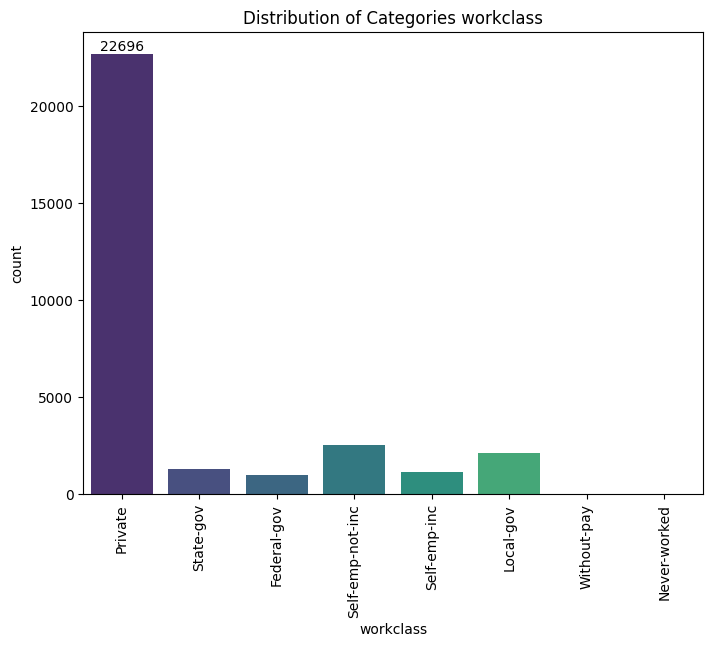

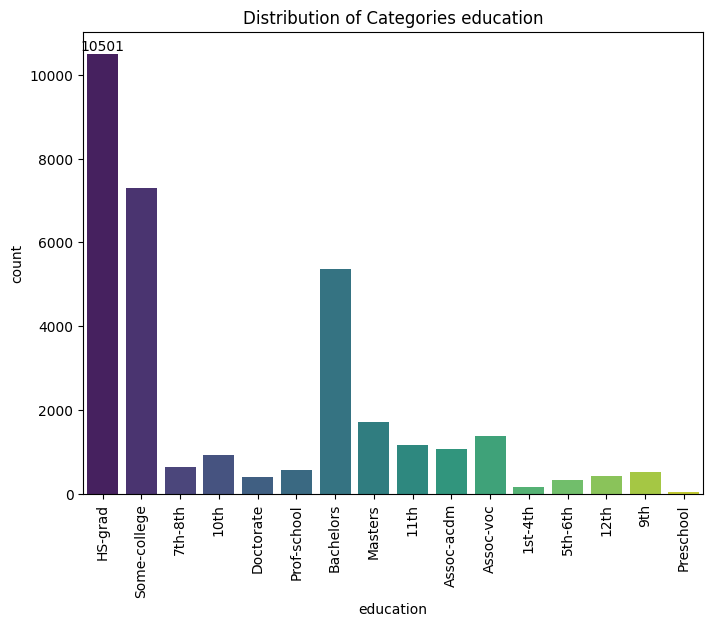

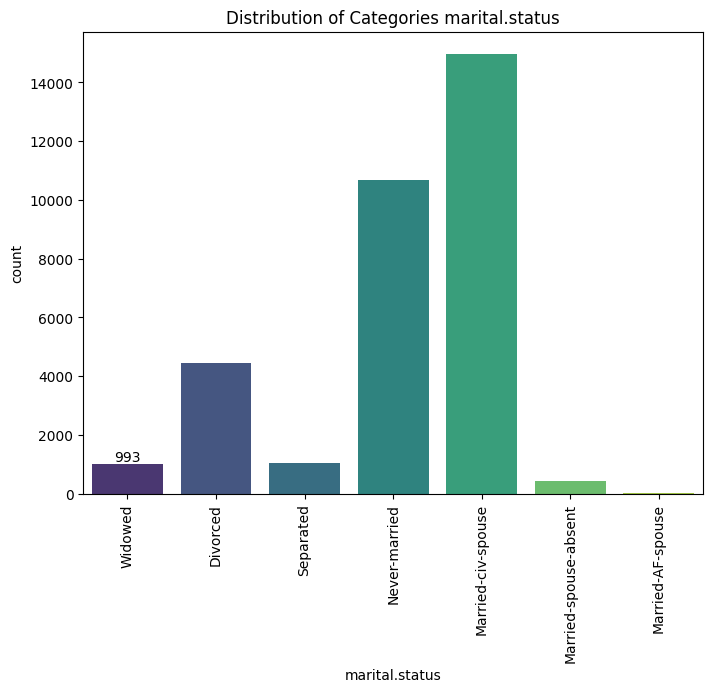

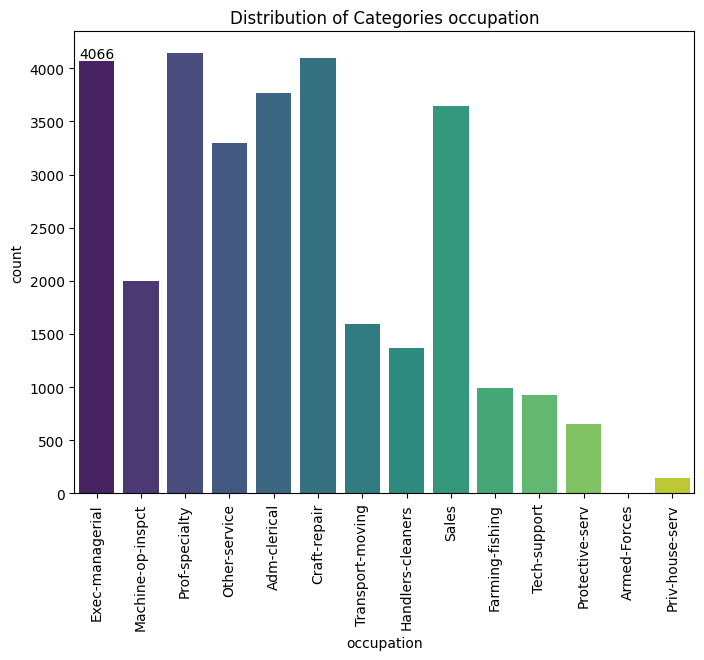

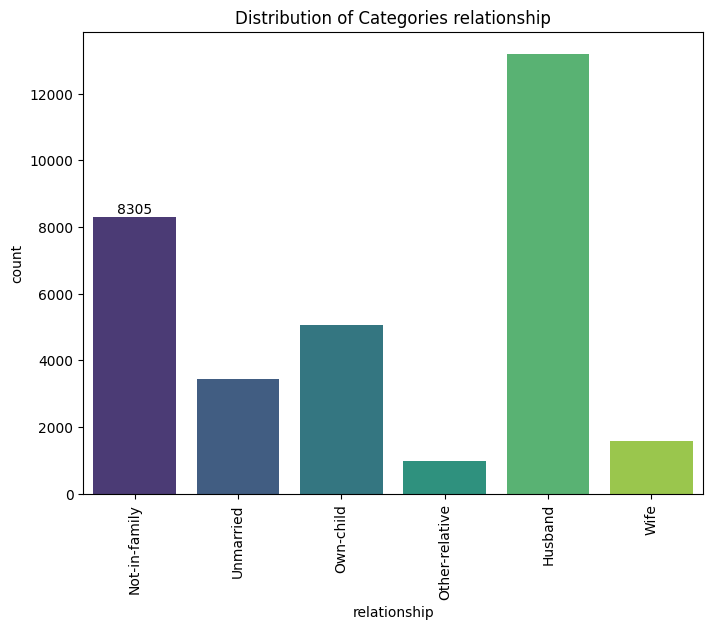

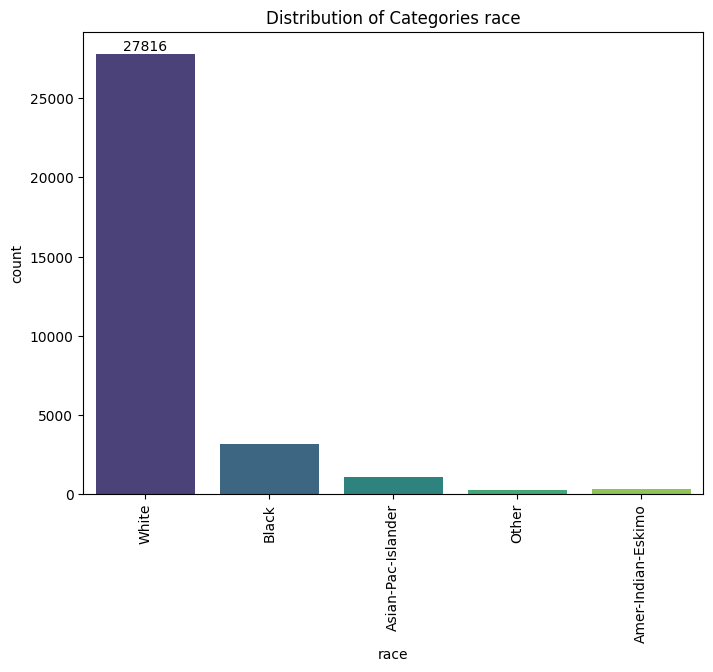

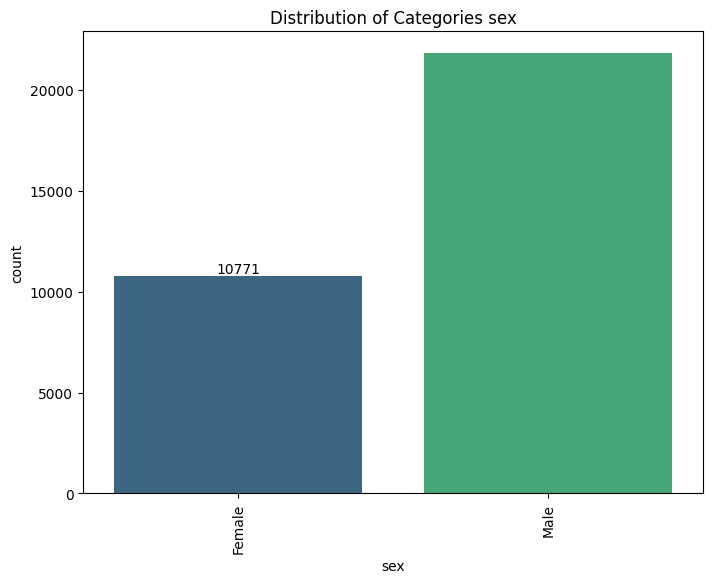

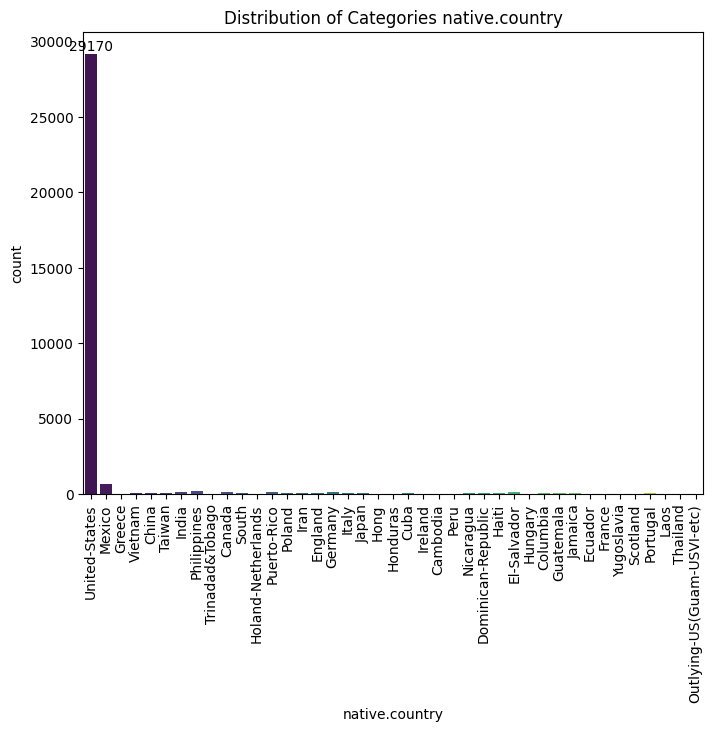

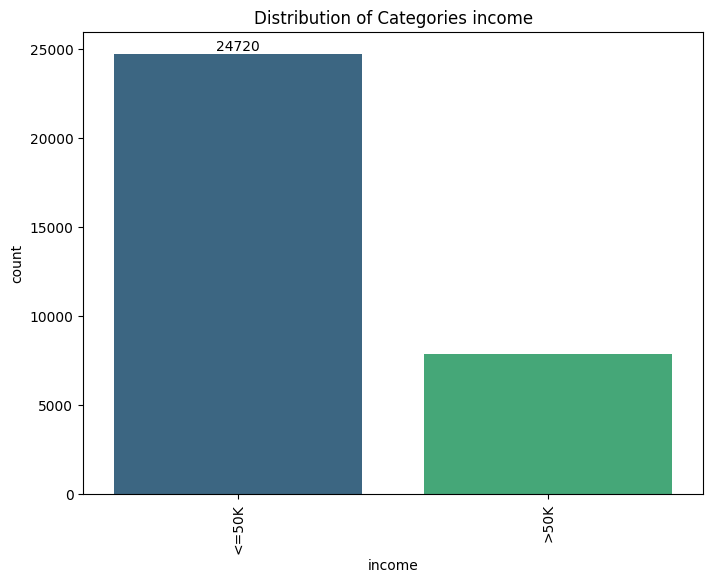

In [14]:

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [15]:
species_count = df['income'].value_counts().reset_index()
species_count.columns = ['income', 'count']

fig = px.bar(species_count, x='income', y='count', text='count', color='income')

fig.update_traces(texttemplate='%{text}', textposition='outside')

In [16]:
species_sex_count = df.groupby(['income', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='income', y='count', color='income', facet_col='sex', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')

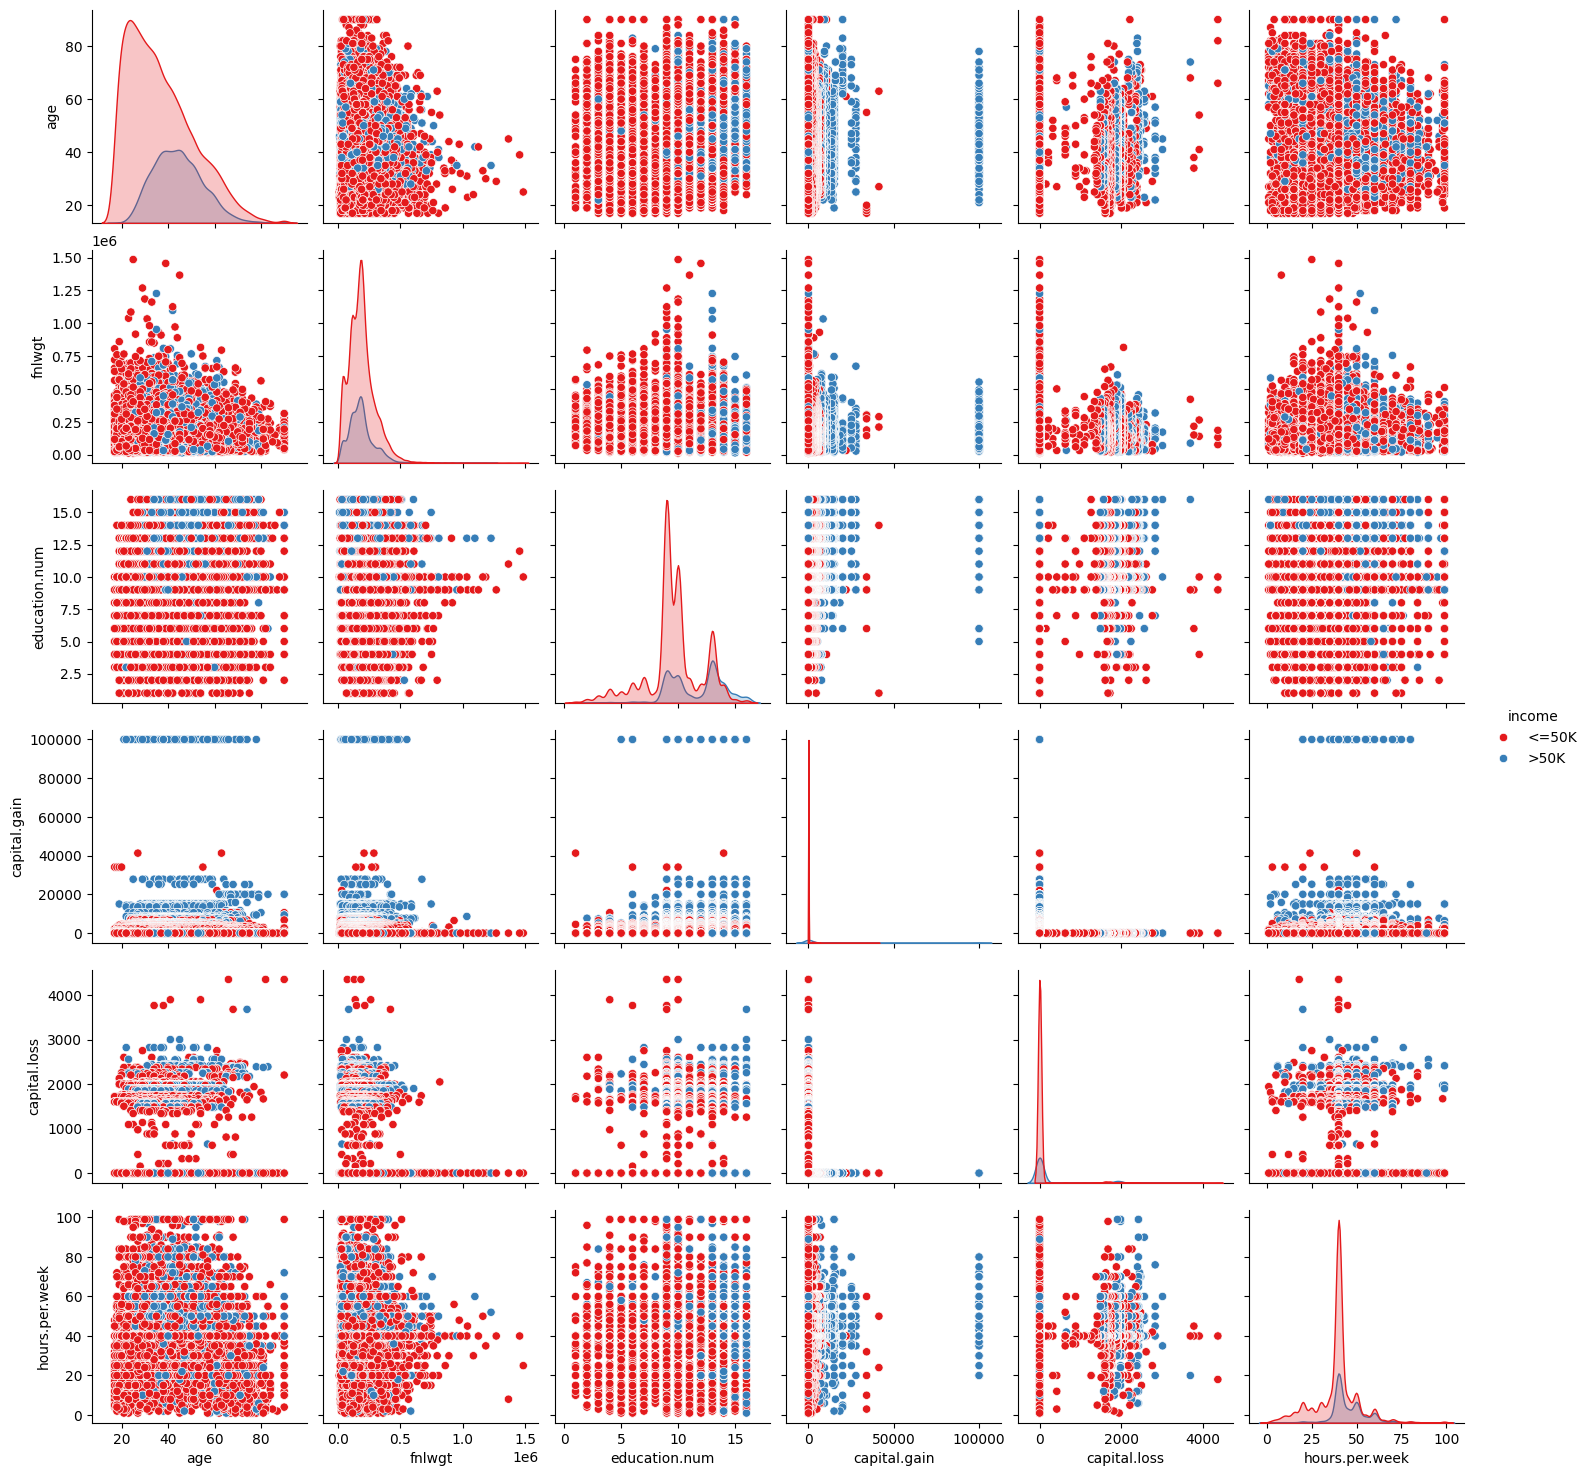

In [17]:
sns.pairplot(df, hue="income", palette="Set1");

In [18]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

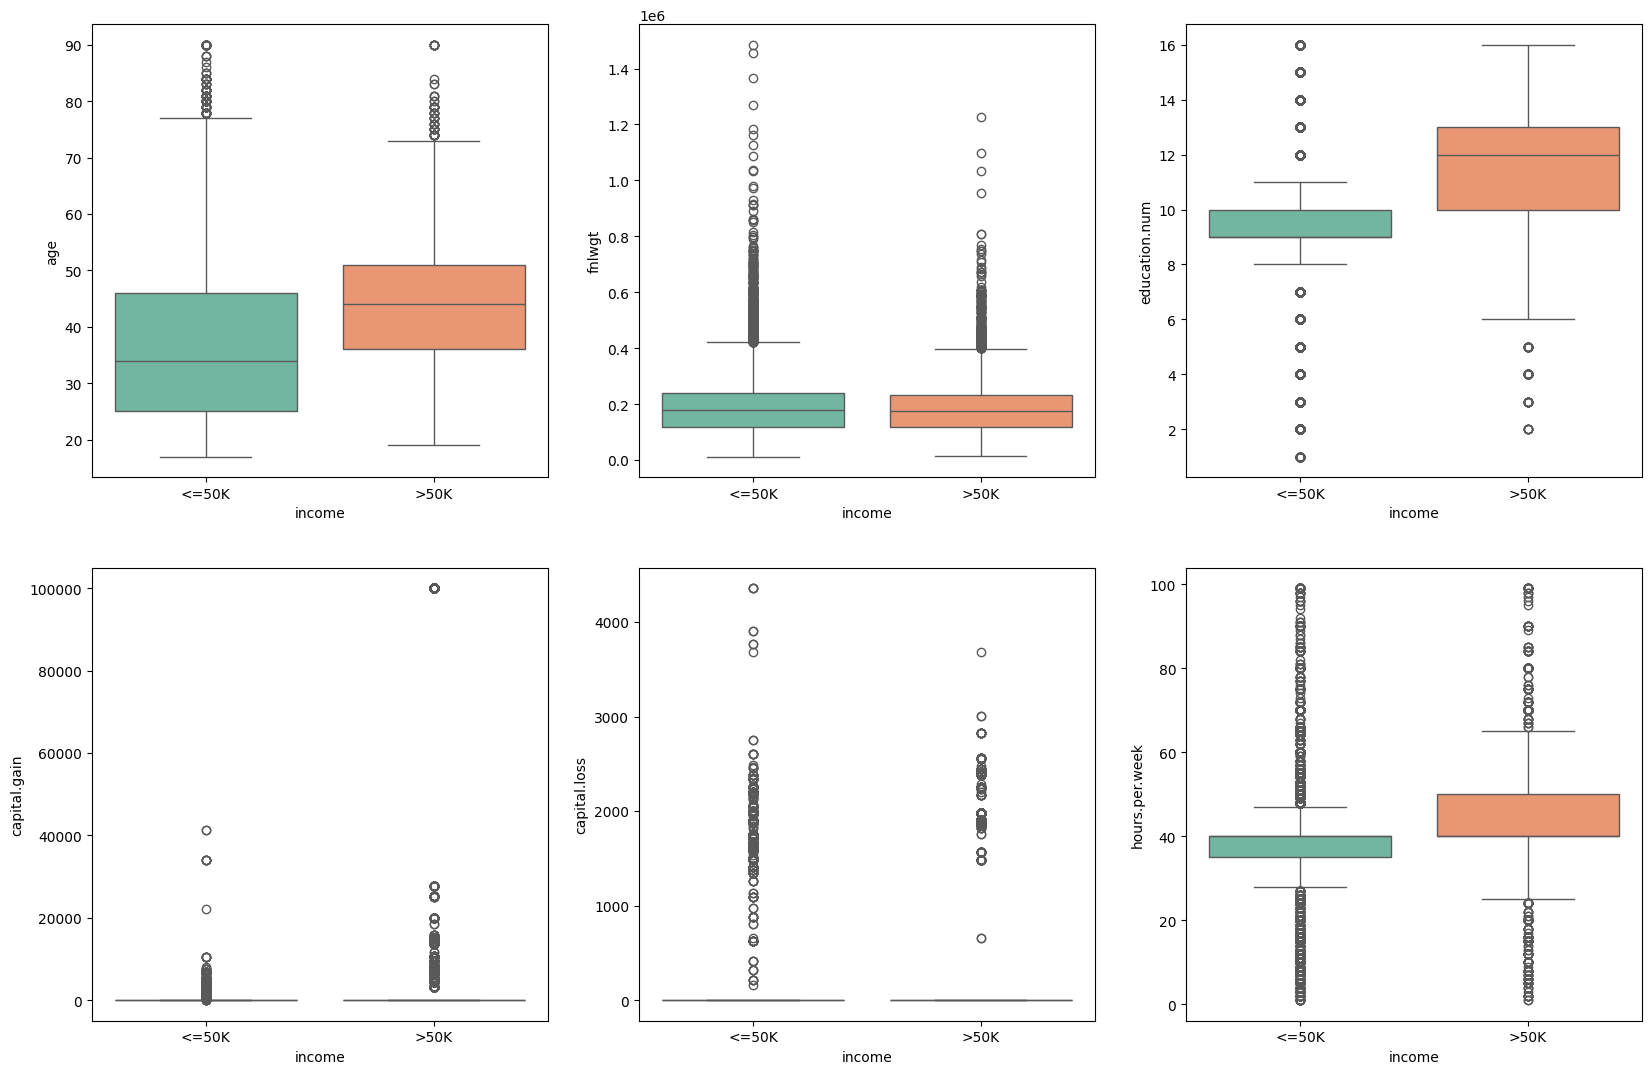

In [19]:
index = 0
plt.figure(figsize=(20,20))
for feature in num_features:
    if feature != "income":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='income',y=feature,data=df, palette='Set2')
plt.show()

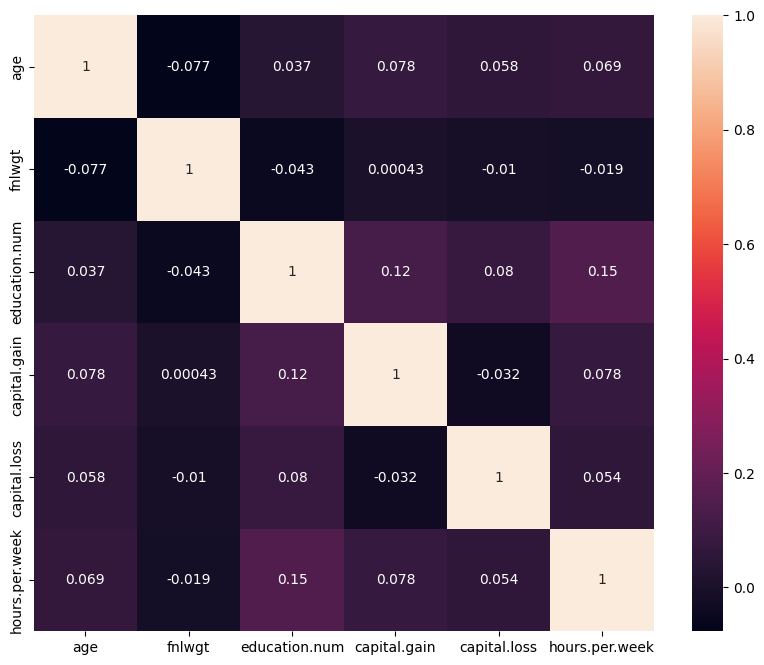

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot = True);

In [21]:
df["income"] = df['income'].map({'>50K': 1, '<=50K': 0})

In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [23]:
from sklearn.impute import SimpleImputer


In [24]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print(df)

         age workclass     fnlwgt     education  education.num  \
0     90.000   Private  77053.000       HS-grad          9.000   
1     82.000   Private 132870.000       HS-grad          9.000   
2     66.000   Private 186061.000  Some-college         10.000   
3     54.000   Private 140359.000       7th-8th          4.000   
4     41.000   Private 264663.000  Some-college         10.000   
...      ...       ...        ...           ...            ...   
32556 22.000   Private 310152.000  Some-college         10.000   
32557 27.000   Private 257302.000    Assoc-acdm         12.000   
32558 40.000   Private 154374.000       HS-grad          9.000   
32559 58.000   Private 151910.000       HS-grad          9.000   
32560 22.000   Private 201490.000       HS-grad          9.000   

           marital.status         occupation   relationship   race     sex  \
0                 Widowed     Prof-specialty  Not-in-family  White  Female   
1                 Widowed    Exec-managerial  Not-i


<p style="background-color:#483D8B; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b> Logistic Regression</b>
</p>

In [25]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [26]:
X = df.drop('income', axis=1)
y = df['income']

### Train | Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [28]:
X_train.shape

(29304, 14)

In [29]:
X_test.shape

(3257, 14)

In [30]:
cat = X_train.select_dtypes("object").columns
cat

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [31]:
hot_enc = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())


In [32]:
pd.DataFrame(column_trans.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.777,1.403,1.133,-0.146,-0.217,-0.037
1,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-1.364,0.294,-0.420,-0.146,-0.217,-0.037
2,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-0.336,-0.117,0.356,-0.146,-0.217,-0.037
3,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-0.777,0.068,-0.420,-0.146,-0.217,0.773
4,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.043,0.093,-0.420,-0.146,-0.217,-0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.190,-0.372,1.909,-0.146,-0.217,0.773
29300,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.997,0.630,1.133,-0.146,-0.217,-0.037
29301,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-1.511,-0.310,-1.197,-0.146,-0.217,-0.037
29302,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,-0.263,1.364,-0.032,-0.146,-0.217,0.773


In [33]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=42))]

pipe_log = Pipeline(steps=operations)

In [34]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('log_model', LogisticRegression(random_state=42))])

In [35]:
y_pred = pipe_log.predict(X_test)
y_pred_proba = pipe_log.predict_proba(X_test)

In [36]:
my_dict = {"actual": y_test}

In [37]:
result_log = pd.DataFrame(my_dict)
result_log

,actual
26410,0.000
8110,1.000
30930,0.000
23211,0.000
18594,0.000
...,...
7518,0.000
6145,1.000
17114,0.000
18396,0.000


In [38]:
result_log["pred"] = y_pred
result_log

,actual,pred
26410,0.000,0.000
8110,1.000,1.000
30930,0.000,0.000
23211,0.000,0.000
18594,0.000,0.000
...,...,...
7518,0.000,0.000
6145,1.000,0.000
17114,0.000,0.000
18396,0.000,1.000


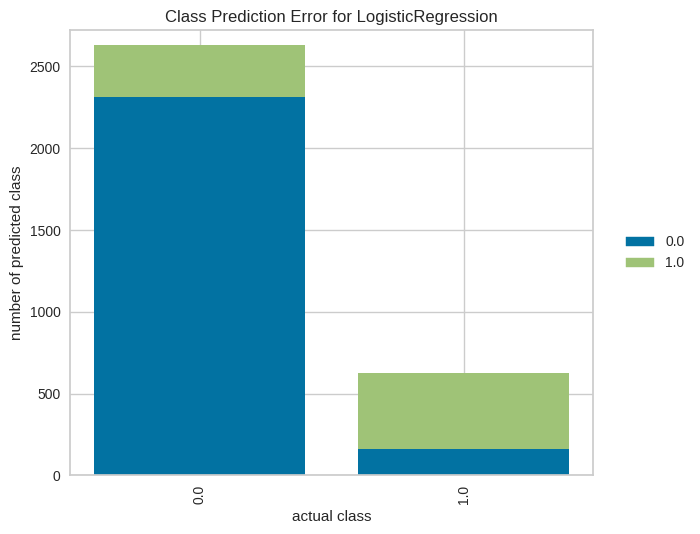

In [39]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_log)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
eval_metric(pipe_log, X_train, y_train, X_test, y_test)

Test_Set
[[2311  162]
 [ 319  465]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      2473
         1.0       0.74      0.59      0.66       784

    accuracy                           0.85      3257
   macro avg       0.81      0.76      0.78      3257
weighted avg       0.85      0.85      0.85      3257


Train_Set
[[20737  1510]
 [ 2831  4226]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     22247
         1.0       0.74      0.60      0.66      7057

    accuracy                           0.85     29304
   macro avg       0.81      0.77      0.78     29304
weighted avg       0.85      0.85      0.85     29304



## Cross Validate

In [42]:
operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision",
                                                            "recall", "f1"],
                                      cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,1.482,0.079,0.850,0.851,0.732,0.737,0.592,0.596,0.655,0.659
2,1.382,0.080,0.862,0.851,0.762,0.736,0.622,0.593,0.685,0.657
3,0.780,0.035,0.846,0.851,0.726,0.734,0.581,0.601,0.645,0.661
4,0.936,0.038,0.850,0.852,0.732,0.736,0.595,0.599,0.656,0.660
5,0.689,0.034,0.851,0.852,0.740,0.736,0.586,0.599,0.654,0.660
6,0.683,0.035,0.846,0.853,0.722,0.739,0.583,0.600,0.645,0.662
7,0.658,0.035,0.853,0.852,0.733,0.736,0.613,0.599,0.668,0.660
8,0.668,0.037,0.853,0.851,0.743,0.735,0.595,0.597,0.661,0.659
9,0.653,0.065,0.846,0.853,0.711,0.739,0.609,0.602,0.656,0.663
10,0.662,0.034,0.844,0.853,0.717,0.739,0.584,0.600,0.643,0.662


In [43]:
df_scores.mean()[2:]

test_accuracy     0.850
train_accuracy    0.852
test_precision    0.732
train_precision   0.737
test_recall       0.596
train_recall      0.599
test_f1           0.657
train_f1          0.660
dtype: float64

## GridSearchCV

In [44]:
from sklearn.metrics import make_scorer, f1_score


In [45]:

operations = [("column_trans", column_trans), ("log_model", LogisticRegression(max_iter=5000, random_state=101))]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 10) #katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight = ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]


param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C,1],  # hata alan alanlar "log_model__C" : C, yapsınlar
    "log_model__class_weight": class_weight,
    "log_model__solver": solver}

scorer = make_scorer(f1_score, average='macro')
grid_model = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          cv = 10, scoring = scorer,
                          return_train_score=True,
                          n_jobs = -1)

In [46]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                                       ('log_model',
                                        Logistic...
             param_grid={'log_model__C': [array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=macro))

In [47]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': None,
 'log_model__penalty': 'l2',
 'log_model__solver': 'liblinear'}

In [48]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2311  162]
 [ 319  465]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      2473
         1.0       0.74      0.59      0.66       784

    accuracy                           0.85      3257
   macro avg       0.81      0.76      0.78      3257
weighted avg       0.85      0.85      0.85      3257


Train_Set
[[20737  1510]
 [ 2829  4228]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     22247
         1.0       0.74      0.60      0.66      7057

    accuracy                           0.85     29304
   macro avg       0.81      0.77      0.78     29304
weighted avg       0.85      0.85      0.85     29304



In [49]:
grid_model.best_score_

0.7810120809425705

In [50]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': None,
 'log_model__penalty': 'l2',
 'log_model__solver': 'liblinear'}

## ROC (Receiver Operating Charecteristic) Curve and AUC (Area Under Curve)

In [51]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score

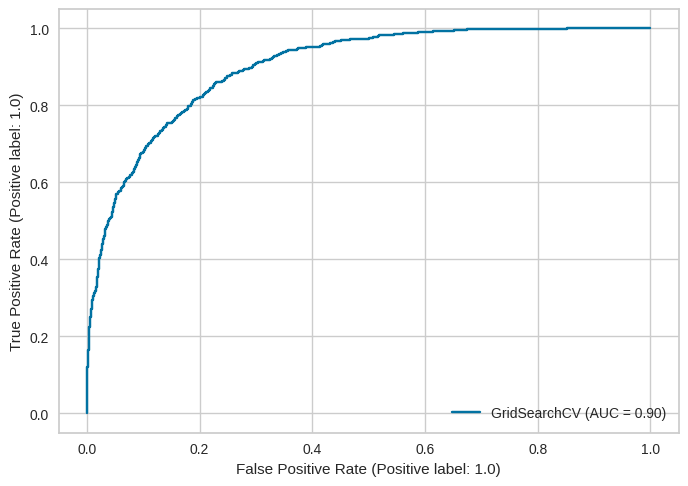

In [52]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

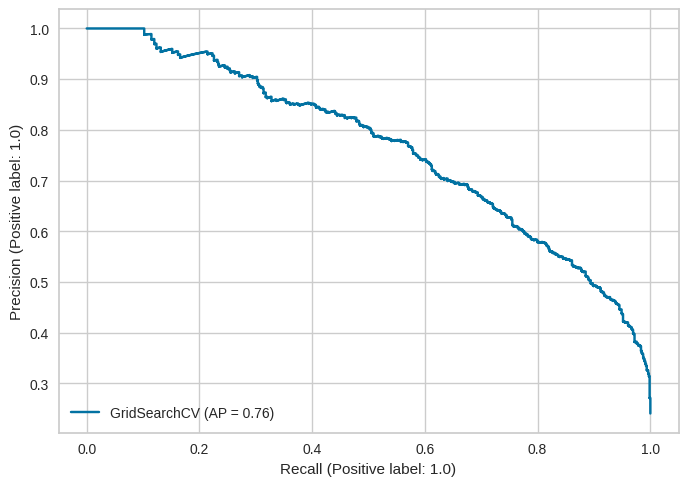

In [53]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)


<p style="background-color:#483D8B; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b> K-Nearest Neighbors (KNN) Classification</b>
</p>

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
hot_enc = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)

In [56]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('knn_model', KNeighborsClassifier())])

In [57]:
y_pred = pipe_knn.predict(X_test)
y_pred_proba = pipe_knn.predict_proba(X_test)

In [58]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))])),
                ('knn_model', KNeighborsClassifier())])

In [59]:
!pip install --upgrade scikit-learn numpy scipy threadpoolctl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [60]:
from sklearn.neighbors import KNeighborsClassifier  # For classification
from sklearn.neighbors import KNeighborsRegressor   # For regression


In [61]:

from sklearn.pipeline import Pipeline

In [62]:
y_pred = pipe_knn.predict(X_test)
y_pred_proba = pipe_knn.predict_proba(X_test)

In [63]:
my_dict = {"actual": y_test}
result_knn = pd.DataFrame(my_dict)
result_knn
result_knn["pred"] = y_pred
result_knn["pred_proba"] = y_pred_proba[:,1]
result_knn

,actual,pred,pred_proba
26410,0.000,0.000,0.000
8110,1.000,1.000,0.800
30930,0.000,0.000,0.000
23211,0.000,0.000,0.000
18594,0.000,0.000,0.000
...,...,...,...
7518,0.000,0.000,0.000
6145,1.000,0.000,0.000
17114,0.000,0.000,0.000
18396,0.000,0.000,0.400


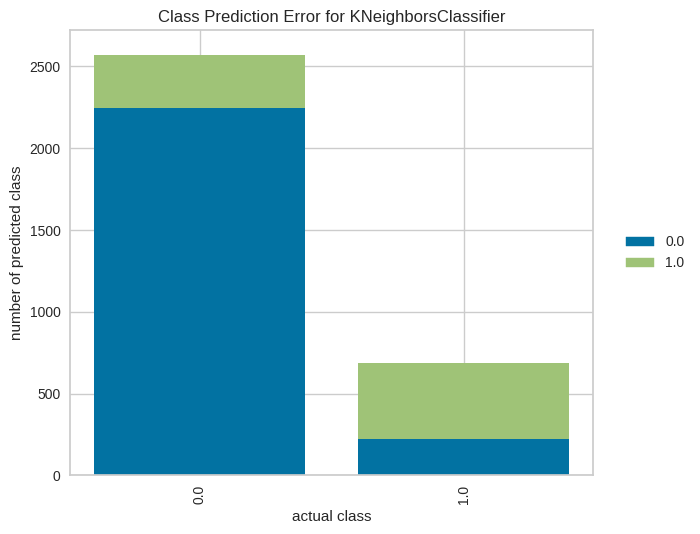

In [64]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_knn)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)

visualizer.poof();

In [65]:
eval_metric(pipe_knn, X_train, y_train, X_test, y_test)

Test_Set
[[2248  225]
 [ 322  462]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      2473
         1.0       0.67      0.59      0.63       784

    accuracy                           0.83      3257
   macro avg       0.77      0.75      0.76      3257
weighted avg       0.83      0.83      0.83      3257


Train_Set
[[20850  1397]
 [ 1989  5068]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92     22247
         1.0       0.78      0.72      0.75      7057

    accuracy                           0.88     29304
   macro avg       0.85      0.83      0.84     29304
weighted avg       0.88      0.88      0.88     29304



In [66]:
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.265,2.028,0.830,0.882,0.659,0.781,0.608,0.710,0.632,0.744
2,0.159,1.593,0.843,0.884,0.690,0.783,0.635,0.718,0.661,0.749
3,0.105,0.903,0.832,0.883,0.659,0.783,0.625,0.713,0.641,0.746
4,0.088,0.886,0.843,0.883,0.695,0.782,0.622,0.713,0.656,0.746
5,0.146,1.430,0.839,0.886,0.692,0.786,0.597,0.722,0.641,0.753
6,0.102,0.921,0.833,0.884,0.670,0.782,0.607,0.717,0.637,0.748
7,0.154,1.519,0.833,0.883,0.660,0.782,0.628,0.714,0.644,0.746
8,0.105,0.927,0.833,0.884,0.663,0.781,0.629,0.718,0.645,0.748
9,0.173,1.819,0.829,0.884,0.650,0.781,0.625,0.721,0.637,0.749
10,0.168,1.893,0.823,0.883,0.643,0.780,0.592,0.719,0.617,0.748


In [67]:
df_scores.mean()[2:]

test_accuracy     0.834
train_accuracy    0.884
test_precision    0.668
train_precision   0.782
test_recall       0.617
train_recall      0.717
test_f1           0.641
train_f1          0.748
dtype: float64

In [68]:
pipe_knn.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse=False),
                                    Index(['workclass', 'education', 'marital.status', 'occupation',
          'relationship', 'race', 'sex', 'native.country'],
         dtype='object'))])),
  ('knn_model', KNeighborsClassifier())],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  Index(['workclass', 'education', 'marital.status', 

In [69]:
hot_enc = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)
param_grid = {"knn_model__n_neighbors": range(1, 30), "knn_model__p":[1,2], "knn_model__weights":["uniform", "distance"]}

scorer = make_scorer(f1_score, average='macro')

knn_pipe_grid = GridSearchCV(pipe_knn, param_grid, cv=5, scoring=scorer)


In [ ]:
knn_pipe_grid.fit(X_train, y_train)  # assuming you have X_train and y_train

In [ ]:
eval_metric(knn_pipe_grid, X_train, y_train, X_test, y_test)

In [ ]:
knn_pipe_grid.best_score_

In [ ]:
knn_pipe_grid.best_params_


<p style="background-color:#483D8B; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b> Support Vector Classifier</b>
</p>

In [ ]:
from sklearn.svm import SVC

In [ ]:
hot_enc = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("svm_model", SVC())]

pipe_svm = Pipeline(steps=operations)

In [ ]:
pipe_svm.fit(X_train, y_train)

In [ ]:
y_predict = pipe_svm.predict(X_test)
y_predict

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_svm, X_test, y_test);

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_svm)

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)
visualizer.poof();


In [ ]:
eval_metric(pipe_svm, X_train, y_train, X_test, y_test)

In [ ]:
operations = [("column_trans", column_trans), ("svm_model", SVC())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"],
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

In [ ]:
df_scores.mean()[2:]

In [ ]:
pipe_svm.get_params()

In [ ]:
hot_enc = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())
operations = [("column_trans", column_trans), ("svm_model",SVC())]
pipe_svm = Pipeline(steps=operations)
param_grid = {'svm_model__C': [0.1, 1.0, 10], 'svm_model__gamma': ["auto", "scale"], 'svm_model__kernel': ["rbf", "linear"] }

#'svm_model__C': [0.1, 1, 5] first given values

scorer = make_scorer(f1_score, average='macro')

# Grid search with cross-validation
svm_pipe_grid = GridSearchCV(pipe_svm, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Fit the grid search object to the data


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
svm_pipe_grid.fit(X_train, y_train)

In [ ]:
y_pred = svm_pipe_grid.predict(X_test)
y_pred

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(svm_pipe_grid, X_train, y_train, X_test, y_test)

In [ ]:
svm_pipe_grid.best_score_

In [ ]:
svm_pipe_grid.best_params_